# Table of contents <a name="back"></a>

24. [Gaussian PDF and CDF](#gaus)
25. [Sampling from a Gaussian Distribution (1-D)](#sampl)
26. [Sampling from a Gaussian Distribution (Spherical and Axis-alignment)](#spherical)
27. [Sampling from a General Multivariate Normal](#normal)
28. [Other Interesting Scipy Functions](#other)

<a name="gaus"></a>
[back](#back)

# 24. Gaussian PDF and CDF

##### PDF - Probability Density Function

<img src="img01/gaussian.png" alt="drawing" width="250" style="float: left">

One question that is common to ask is, given a sample of a random variable, what is its probability density.

In [3]:
# import the norm module
from scipy.stats import norm

Find the probability density of 0 from the standard normal distribution.

In [4]:
norm.pdf(0)

0.3989422804014327

In [5]:
# loc -> mean
# scale -> standard deviation, not the variance
norm.pdf(0, loc=5, scale=10)

0.03520653267642995

If we have a random array, we can calculate the PDF of all the values at the same time.

In [6]:
import numpy as np
r = np.random.randn(10)

In [7]:
norm.pdf(r)

array([0.38160555, 0.23340353, 0.39603051, 0.32975728, 0.39720467,
       0.08914556, 0.36507618, 0.17248495, 0.28563951, 0.07085408])

A common calculation we need is not exactly PDF, but the log of a PDF. 

When we want to calculate the joint probability of some samples of data, we need to multiply them together. But if we calculate the joint log probability, then we can add all the individual log probabilities together.

Adding is a cheaper operation then multiplying, so this saves us time.

<img src="img01/logp.png" alt="drawing" width="250" style="float: left">

Conveniently, there's a function for that too.

In [13]:
norm.logpdf(r)

array([-0.96336781, -1.45498645, -0.92626402, -1.10939843, -0.92330359,
       -2.41748474, -1.00764923, -1.75744531, -1.25302471, -2.64713274])

##### CDF - Cumulative Distribution Function

This is an integral of the PDF from -∞ to x.

This integral is not actually solvable, so we can't find a mathematical expression for it, but we can compute it numerically.

In [14]:
norm.cdf(r)

array([0.38281666, 0.84976374, 0.45182919, 0.7314443 , 0.46277896,
       0.95829295, 0.33679934, 0.09766088, 0.20684477, 0.9684961 ])

There's also a log CDF.

In [15]:
norm.logcdf(r)

array([-0.96019909, -0.16279692, -0.79445106, -0.3127342 , -0.77050574,
       -0.04260175, -1.08826794, -2.32625424, -1.57578668, -0.03201082])

<a name="sampl"></a>
[back](#back)

# 25. Sampling from a Gaussian Distribution (1-D)

Let's first review how to sample form a standard normal distribution

In [16]:
r = np.random.randn(10000)

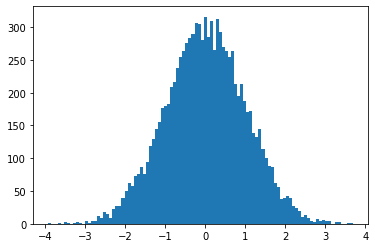

In [19]:
import matplotlib.pyplot as plt
plt.hist(r, bins=100)
plt.show()

Samples with gaussian with standard deviation 10 and mean 5

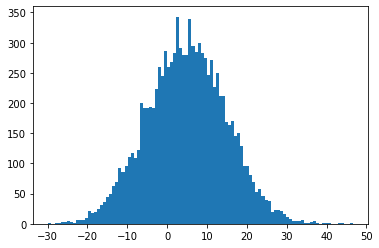

In [21]:
r = 10*np.random.randn(10000) + 5
import matplotlib.pyplot as plt
plt.hist(r, bins=100)
plt.show()

<a name="spherical"></a>
[back](#back)

# 26. Sampling from a Gaussian Distribution (Spherical and Axis-alignment)

In [24]:
r = np.random.randn(10000, 2)

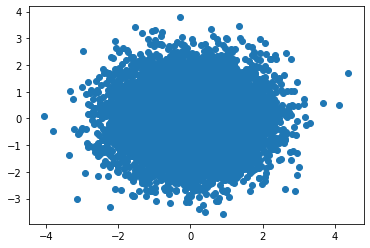

In [25]:
import matplotlib.pyplot as plt
plt.scatter(r[:,0], r[:,1])
plt.show()

Ellyptical qaussian, where variance is different for each dimension.

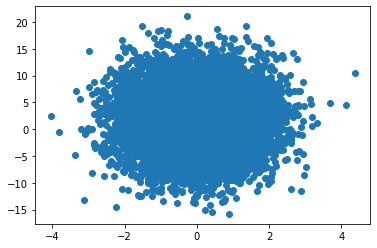

In [26]:
r[:,1] = 5*r[:,1] + 2
plt.scatter(r[:,0], r[:,1])
plt.show()

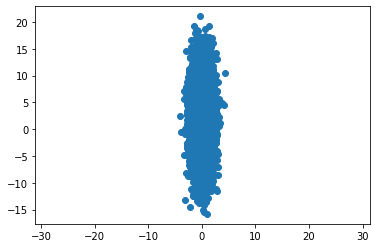

In [27]:
plt.axis('equal') #make each axis equal size
plt.scatter(r[:,0], r[:,1])
plt.show()

<a name="normal"></a>
[back](#back)

# 27. Sampling from a General Multivariate Normal Distribution

...where the dimensions are not necessarily independent from one another. This means that we have a focal variance matrix.

In the following example we have a variance of 1 in the first dimension and the variance of 3 in the second dimension. And the covariance between the two dimensions is 0.8.

In [29]:
cov = np.array([[1, 0.8], [0.8, 3]])

In [31]:
from scipy.stats import multivariate_normal as mvn

old: https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.multivariate_normal.html

new: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.multivariate_normal.html

Unfortunately the old version is still at the top of Google results so be careful.

Let's create some random values:

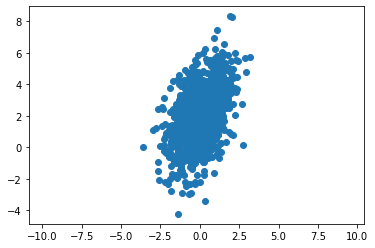

In [38]:
mu = np.array([0,2])
r = mvn.rvs(mean=mu, cov=cov, size=1000)
plt.scatter(r[:,0], r[:,1])
plt.axis('equal')
plt.show()

There's a way to draw these samples using Numpy as well.

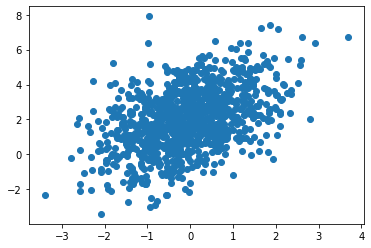

In [39]:
r = np.random.multivariate_normal(mean=mu, cov=cov, size=1000)
plt.scatter(r[:,0], r[:,1])
plt.show()

<a name="other"></a>
[back](#back)

# 28. Other Interesting Scipy Functions

* scipy.io.loadmat - useful if you ever come across a dataset that is stored as a matlab file.
* scipy.io.wavfile.read - load raw audio files
* scipy.signal - signal processing such as convolution

[back](#back)